In [ ]:
!pip install opencv-python
!pip install imgbeddings
!pip install psycopg2-binary

In [ ]:
import cv2

alg = "/content/haarcascade_frontalface_default.xml"

haar_cascade = cv2.CascadeClassifier(alg)

file_name = "/content/kapakoulak.jpg"

img = cv2.imread(file_name, 0)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

faces = haar_cascade.detectMultiScale(
    gray_img, scaleFactor=1.05, minNeighbors=5, minSize=(100, 100)
)
i = 0
for x, y, w, h in faces:
  cropped_image = img[y : y + h, x : x + w]
  target_file_name = 'stored_faces/' + str(i) + '.jpg'
  cv2.imwrite(
      target_file_name,
      cropped_image,
  )
  i = i + 1;

In [ ]:
import numpy as np
from imgbeddings import imgbeddings
from PIL import Image
import psycopg2
import os

# Establish a connection to the PostgreSQL database
conn = psycopg2.connect("PUT YOUR AIVEN CONNECTION HERE!")
cur = conn.cursor()

# Create a cursor for executing SQL queries

# Iterate through files in the "stored_faces" directory
for filename in os.listdir("stored_faces"):
    filepath = os.path.join("stored_faces", filename)
    if os.path.isfile(filepath):  # Check if it's a file
        try:
            # Open the image file
            img = Image.open(filepath)

            # Generate embeddings from the image
            ibed = imgbeddings()
            embedding = ibed.to_embeddings(img)

            # Insert filename and embeddings into the database
            cur.execute("INSERT INTO pictures VALUES (%s, %s)", (filename, embedding[0].tolist()))

            print(f"Inserted embeddings for {filename}")
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Commit the transaction and close the cursor
conn.commit()
cur.close()


Error processing 0.jpg: duplicate key value violates unique constraint "pictures_pkey"
DETAIL:  Key (picture)=(0.jpg) already exists.



In [ ]:
file_name = "/content/grizly.jpg"
img = Image.open(file_name)
ibed = imgbeddings()
embedding = ibed.to_embeddings(img)


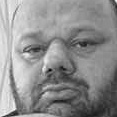

In [ ]:
from IPython.display import Image, display

cur = conn.cursor()
string_representation = "["+ ",".join(str(x) for x in embedding[0].tolist()) + "]"
cur.execute("SELECT * FROM pictures ORDER BY embedding <-> %s LIMIT 1;", (string_representation,))
rows = cur.fetchall()
for row in rows:
  display(Image(filename="stored_faces/"+row[0]))
cur.close()